<a href="https://colab.research.google.com/github/adityachandra512/DIgital_Image_Processing/blob/main/AP22110011050_exp6_AdityaChandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Write programs to perform the following sharpening operations on a grayscale image:

#a. Laplacian filter
#b. Filtering using composite mask
#c. Unsharp masking
#d. High boost filtering
#e. Filtering using first order derivative operators such as sobel and prewitt mask.

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('OIP (2).jpeg', cv2.IMREAD_GRAYSCALE)

def show_image(title, img):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

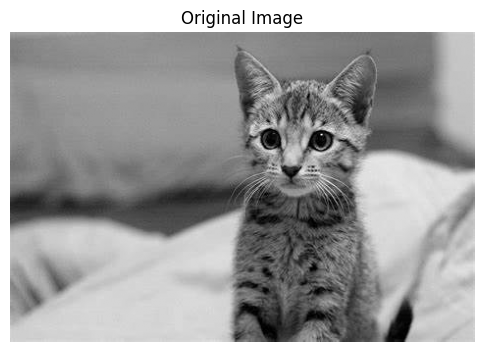

In [25]:
show_image("Original Image", image)

# 1. Laplacian Filter

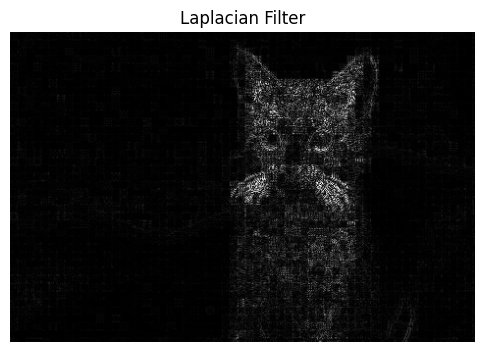

In [26]:
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))
show_image("Laplacian Filter", laplacian)

# 2. Composite Mask Filtering (Using a 3x3 Sharpening Kernel)

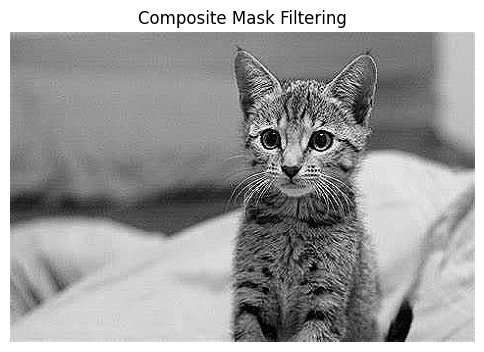

In [27]:
composite_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
composite_filtered = cv2.filter2D(image, -1, composite_kernel)
show_image("Composite Mask Filtering", composite_filtered)

# 3. Unsharp Masking

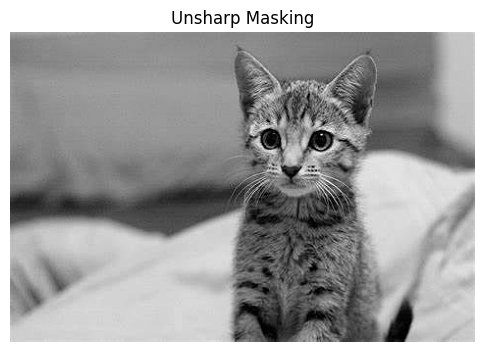

In [28]:
blurred = cv2.GaussianBlur(image, (5, 5), 1.0)
unsharp_mask = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
show_image("Unsharp Masking", unsharp_mask)

# 4. High Boost Filtering (k=2)

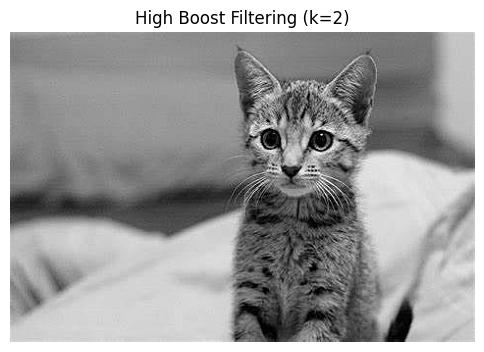

In [29]:
k = 2
high_boost = cv2.addWeighted(image, k, blurred, -(k - 1), 0)
show_image(f"High Boost Filtering (k={k})", high_boost)

# 5. Sobel and Prewitt Operators
# Sobel Filter

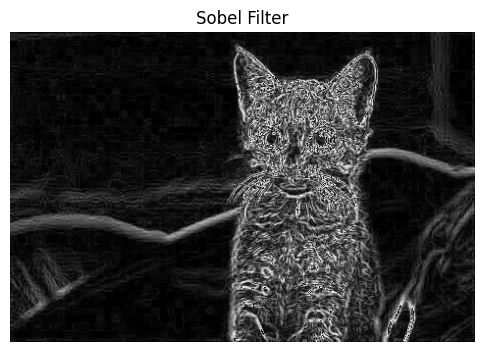

In [30]:
# 5. Sobel and Prewitt Operators
# Sobel Filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = np.uint8(np.absolute(sobel_combined))  # Convert to uint8
show_image("Sobel Filter", sobel_combined)

# Prewitt Filter

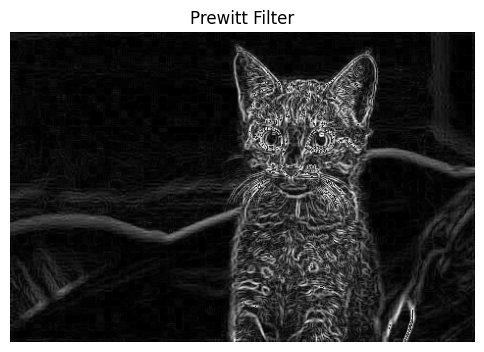

In [31]:
# Prewitt Filter
prewitt_x = cv2.filter2D(image, cv2.CV_32F, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitt_y = cv2.filter2D(image, cv2.CV_32F, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)
prewitt_combined = np.uint8(np.absolute(prewitt_combined))  # Convert to uint8
show_image("Prewitt Filter", prewitt_combined)